In [1]:
import os
import numpy as np

In [2]:
# -- plotting --
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
# read GSWLC data: https://salims.pages.iu.edu/gswlc/#catalog-download
# data column details: https://salims.pages.iu.edu/gswlc/table2.pdf
fgswlc = os.path.join(os.environ['GALPOPFM_DIR'], 'obs', 'GSWLC-M2.dat')

gswlc = np.loadtxt(fgswlc, unpack=True)

In [4]:
logm = gswlc[9]
logsfr = gswlc[11]
Av = gswlc[17]

In [5]:
has_Av = (Av != -99.)
mlim = (logm > 10.)

cuts = has_Av & mlim

is_q = (logsfr < logm - 11.5)
is_sf = (logsfr > logm - 11.5)

(-4.2, 3.2)

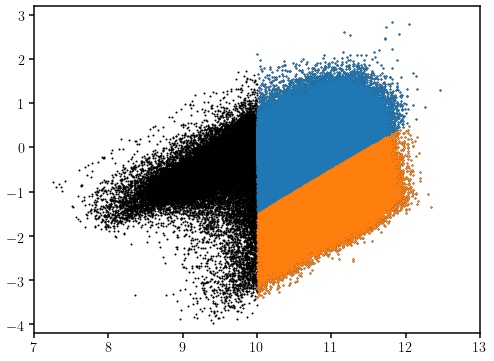

In [6]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
sub.scatter(logm, logsfr, s=1, c='k')
sub.scatter(logm[cuts & is_sf], logsfr[cuts & is_sf], s=1)
sub.scatter(logm[cuts & is_q], logsfr[cuts & is_q], s=1)
sub.set_xlim(7, 13)
sub.set_ylim(-4.2, 3.2)

(0.0, 2.0)

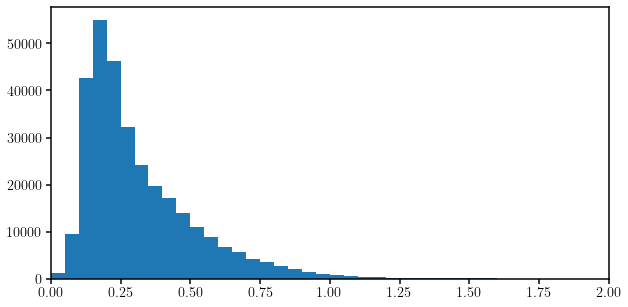

In [7]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.hist(Av[cuts], range=(0., 2.), bins=40)
sub.set_xlim(0., 2.)

(0.0, 2.0)

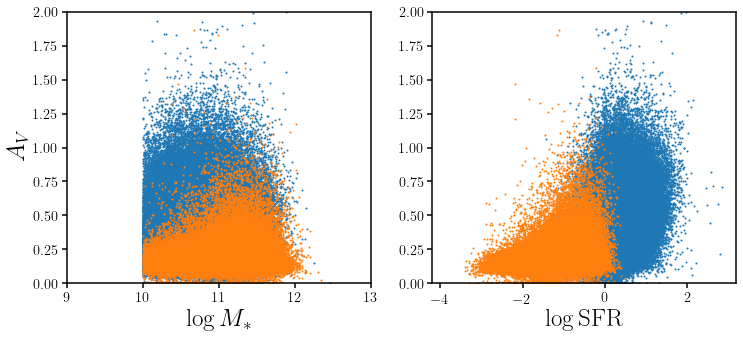

In [8]:
fig = plt.figure(figsize=(12,5))
sub = fig.add_subplot(121)
sub.scatter(logm[cuts & is_sf], Av[cuts & is_sf], s=1)
sub.scatter(logm[cuts & is_q], Av[cuts & is_q], s=1)
sub.set_xlabel('$\log M_*$', fontsize=25)
sub.set_xlim(9, 13)
sub.set_ylabel('$A_V$', fontsize=25)
sub.set_ylim(0, 2.)

sub = fig.add_subplot(122)
sub.scatter(logsfr[cuts & is_sf], Av[cuts & is_sf], s=1)
sub.scatter(logsfr[cuts & is_q], Av[cuts & is_q], s=1)
sub.set_xlabel(r'$\log {\rm SFR}$', fontsize=25)
sub.set_xlim(-4.2, 3.2)
sub.set_ylim(0, 2.)